In [1]:
from keras.models import *
from keras.layers import *
from keras.applications import ResNet50
from keras.preprocessing.image import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint


import numpy as np
import os

np.random.seed(2017)

from skimage.io import imread_collection, imread
from skimage.transform import resize

filepath='../every.resn50.hdf5'
img_width, img_height = 150, 150

train_data_dir = '../dataset/training_set/smo'
validation_data_dir = '../dataset/test_set/smo'

nb_train_samples = 4521
nb_validation_samples = 770
epochs = 4
batch_size = 16



if __name__ == '__main__':

    base_model = ResNet50(include_top=False, weights='imagenet', pooling='avg',
                          input_tensor=Input((224, 224, 3)))
    for layer in base_model.layers:
        layer.trainable = False
    # for tmp in zip([x.name for x in base_model.layers], range(len(base_model.layers))):
    #     print(tmp)

    # x = Flatten()(base_model.output)
    x = Dense(2, activation='softmax', name='fc2')(base_model.output)

    model = Model(base_model.input, x)

    # for tmp in zip([x.name for x in model.layers], range(len(model.layers))):
    #     print(tmp)

    for layer in model.layers[140:]:
        layer.trainable = True

    # load data
    # now_path = os.path.abspath(os.path.curdir)
    # project_path, tmp = os.path.split(now_path)
    # train_path = os.path.join(project_path, 'train')
    #train_path = '/home/zhangzhe/pycharm/dogcat/train'
    train3_path ='../dataset/training_set/smo'
    val3_path = '../dataset/test_set/smo'

    #n = 25000
    # X = np.zeros((n, 224, 224, 3), dtype=np.uint8)
    # y = np.zeros((n, 2), dtype=np.float32)
    #
    # for i in range(n//2):
    #     X[i] = resize(imread(os.path.join(train_path, 'cat.%d.jpg' % i)), (224, 224, 3))
    #     X[i+n//2] = resize(imread(os.path.join(train_path, 'dog.%d.jpg' % i)), (224, 224, 3))
    #     if i % 1000 == 0:
    #         print(i)
    #
    # y[:n//2] = np.array([1.0, 0.0])
    # y[n//2:] = np.array([0.0, 1.0])
    #
    # # optiz = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.1)
    optiz = Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
    #
    model.compile(optimizer=optiz,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # # X_train, y_train, X_val, y_val = train_test_split(X, y, test_size=0.1)
    # model.fit(X, y, batch_size=32, epochs=15, validation_split=0.1)

    data_gen = ImageDataGenerator()
    train_data_gen = data_gen.flow_from_directory(train3_path, (224, 224), shuffle='False', batch_size=32)
    val_data_gen = data_gen.flow_from_directory(val3_path, (224, 224), shuffle='False', batch_size=32)

    # fine-tune the model
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    
    model.fit_generator(train_data_gen, steps_per_epoch=nb_train_samples, epochs=epochs, validation_data=val_data_gen, validation_steps=nb_validation_samples,  callbacks=callbacks_list)

    model.save('fine_tuning_dogcat_resnet50')

/home/aewin/work/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 4521 images belonging to 2 classes.
Found 770 images belonging to 2 classes.
Epoch 1/4


KeyboardInterrupt: 

Start Prediction: 
0 frame200.jpg
show ans=  0.86217815
smorking----------smorking------smorking------------------


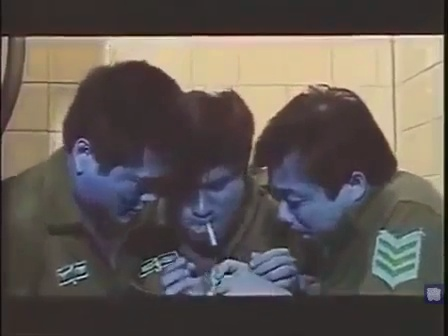

-------------------------------------------------
      0.86217815 frame200
1 frame1825.jpg
show ans=  0.0
      0.0 frame1825
2 frame175.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


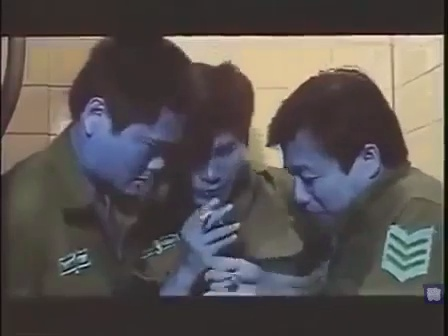

-------------------------------------------------
      1.0 frame175
3 frame1450.jpg
show ans=  7.4421414e-33
      7.4421414e-33 frame1450
4 frame2550.jpg
show ans=  5.412128e-34
      5.412128e-34 frame2550
5 frame750.jpg
show ans=  9.504991e-35
      9.504991e-35 frame750
6 frame75.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


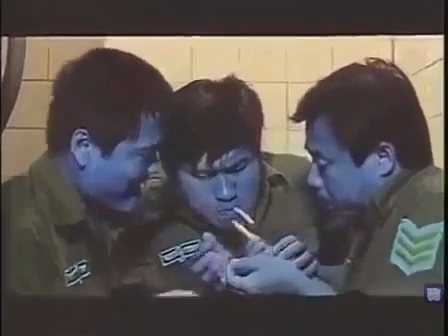

-------------------------------------------------
      1.0 frame75
7 frame50.jpg
show ans=  0.9984078
smorking----------smorking------smorking------------------


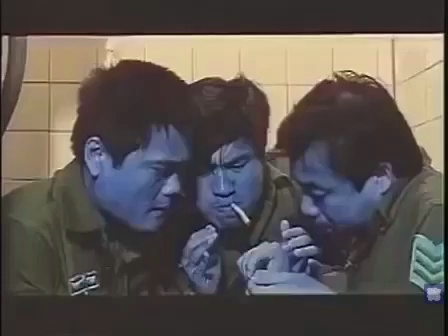

-------------------------------------------------
      0.9984078 frame50
8 frame3025.jpg
show ans=  1.1354608e-12
      1.1354608e-12 frame3025
9 frame2375.jpg
show ans=  9.630974e-37
      9.630974e-37 frame2375
10 frame3200.jpg
show ans=  3.1614016e-09
      3.1614016e-09 frame3200
11 frame875.jpg
show ans=  0.0
      0.0 frame875
12 frame2400.jpg
show ans=  2.2063186e-36
      2.2063186e-36 frame2400
13 frame450.jpg
show ans=  0.11257997
      0.11257997 frame450
14 frame5125.jpg
show ans=  4.2687776e-24
      4.2687776e-24 frame5125
15 frame4825.jpg
show ans=  0.0
      0.0 frame4825
16 frame3625.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


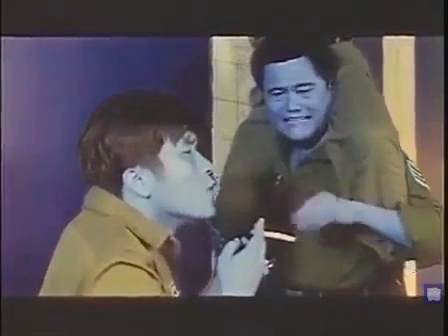

-------------------------------------------------
      1.0 frame3625
17 frame2475.jpg
show ans=  7.4453844e-24
      7.4453844e-24 frame2475
18 frame1500.jpg
show ans=  3.6791518e-35
      3.6791518e-35 frame1500
19 frame725.jpg
show ans=  2.941224e-32
      2.941224e-32 frame725
20 frame2175.jpg
show ans=  8.2048435e-38
      8.2048435e-38 frame2175
21 frame925.jpg
show ans=  3.1929746e-31
      3.1929746e-31 frame925
22 frame4500.jpg
show ans=  1.1606364e-21
      1.1606364e-21 frame4500
23 frame2200.jpg
show ans=  0.0
      0.0 frame2200
24 frame4400.jpg
show ans=  1.301316e-19
      1.301316e-19 frame4400
25 frame1625.jpg
show ans=  2.7818212e-22
      2.7818212e-22 frame1625
26 frame4850.jpg
show ans=  0.0
      0.0 frame4850
27 frame2275.jpg
show ans=  4.5125154e-38
      4.5125154e-38 frame2275
28 frame1525.jpg
show ans=  1.8038299e-23
      1.8038299e-23 frame1525
29 frame2000.jpg
show ans=  0.0
      0.0 frame2000
30 frame2250.jpg
show ans=  5.705902e-37
      5.705902e-37 fr

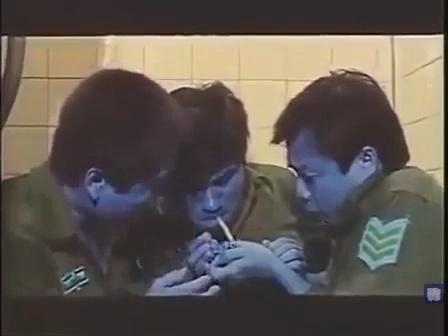

-------------------------------------------------
      0.99999976 frame250
37 frame3750.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


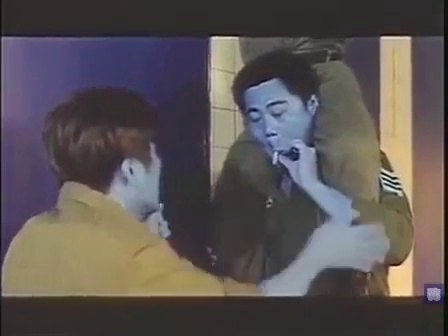

-------------------------------------------------
      1.0 frame3750
38 frame3050.jpg
show ans=  1.1891463e-10
      1.1891463e-10 frame3050
39 frame3900.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


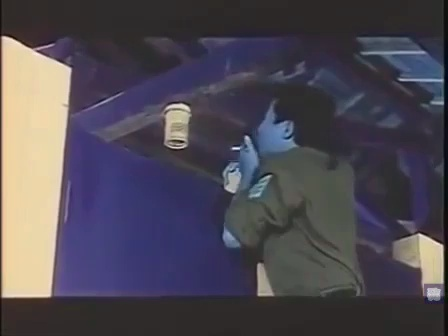

-------------------------------------------------
      1.0 frame3900
40 frame2900.jpg
show ans=  4.7189866e-22
      4.7189866e-22 frame2900
41 frame4425.jpg
show ans=  0.0
      0.0 frame4425
42 frame1125.jpg
show ans=  0.0
      0.0 frame1125
43 frame2075.jpg
show ans=  2.1205881e-23
      2.1205881e-23 frame2075
44 frame1900.jpg
show ans=  0.0
      0.0 frame1900
45 frame3875.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


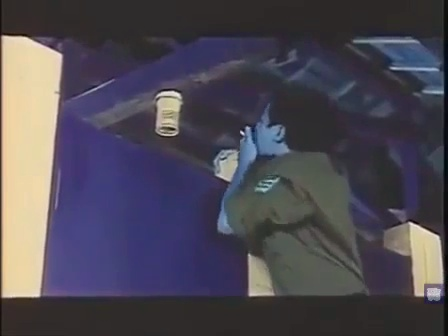

-------------------------------------------------
      1.0 frame3875
46 frame4175.jpg
show ans=  0.0
      0.0 frame4175
47 frame4975.jpg
show ans=  0.0
      0.0 frame4975
48 frame3675.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


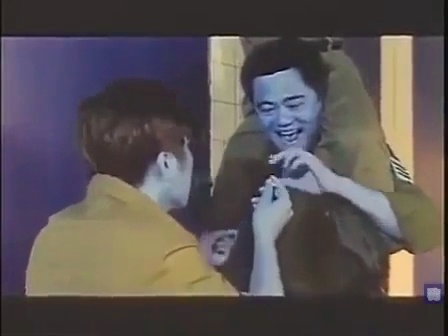

-------------------------------------------------
      1.0 frame3675
49 frame4900.jpg
show ans=  2.1880013e-32
      2.1880013e-32 frame4900
50 frame3450.jpg
show ans=  1.1026568e-27
      1.1026568e-27 frame3450
51 frame600.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


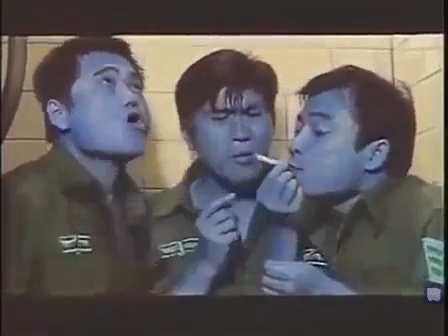

-------------------------------------------------
      1.0 frame600
52 frame5050.jpg
show ans=  1.2760679e-35
      1.2760679e-35 frame5050
53 frame1775.jpg
show ans=  0.0
      0.0 frame1775
54 frame3000.jpg
show ans=  5.117427e-16
      5.117427e-16 frame3000
55 frame3375.jpg
show ans=  4.727254e-23
      4.727254e-23 frame3375
56 frame2125.jpg
show ans=  5.703736e-26
      5.703736e-26 frame2125
57 frame4775.jpg
show ans=  0.0
      0.0 frame4775
58 frame225.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


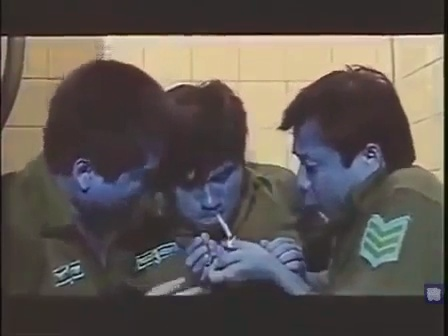

-------------------------------------------------
      1.0 frame225
59 frame4550.jpg
show ans=  4.652134e-24
      4.652134e-24 frame4550
60 frame5175.jpg
show ans=  4.3724455e-08
      4.3724455e-08 frame5175
61 frame4675.jpg
show ans=  0.0
      0.0 frame4675
62 frame850.jpg
show ans=  5.109606e-38
      5.109606e-38 frame850
63 frame1150.jpg
show ans=  0.0
      0.0 frame1150
64 frame1425.jpg
show ans=  0.0
      0.0 frame1425
65 frame1925.jpg
show ans=  0.0
      0.0 frame1925
66 frame1475.jpg
show ans=  0.0
      0.0 frame1475
67 frame300.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


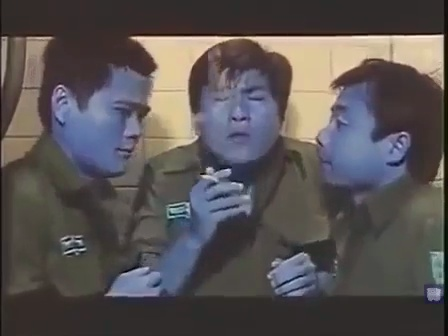

-------------------------------------------------
      1.0 frame300
68 frame1950.jpg
show ans=  0.0
      0.0 frame1950
69 frame1750.jpg
show ans=  0.0
      0.0 frame1750
70 frame675.jpg
show ans=  8.459725e-06
      8.459725e-06 frame675
71 frame4275.jpg
show ans=  4.4772503e-28
      4.4772503e-28 frame4275
72 frame3550.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


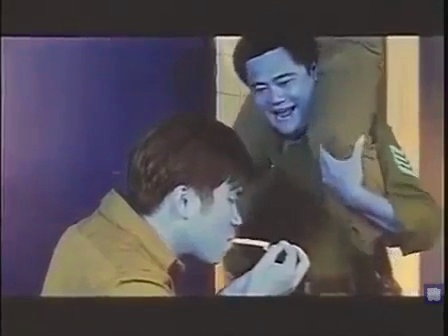

-------------------------------------------------
      1.0 frame3550
73 frame5075.jpg
show ans=  3.5656795e-30
      3.5656795e-30 frame5075
74 frame375.jpg
show ans=  0.9999976
smorking----------smorking------smorking------------------


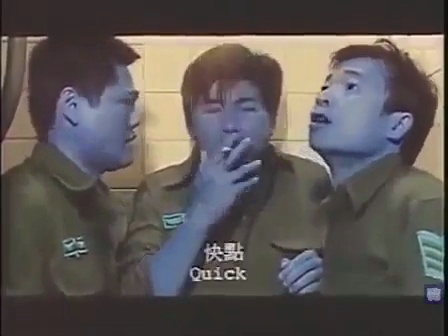

-------------------------------------------------
      0.9999976 frame375
75 frame3800.jpg
show ans=  0.9828247
smorking----------smorking------smorking------------------


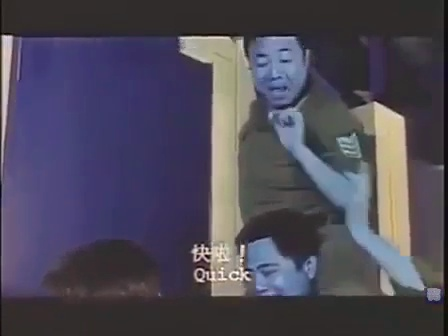

-------------------------------------------------
      0.9828247 frame3800
76 frame2500.jpg
show ans=  1.8968455e-26
      1.8968455e-26 frame2500
77 frame3150.jpg
show ans=  1.7983651e-11
      1.7983651e-11 frame3150
78 frame3600.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


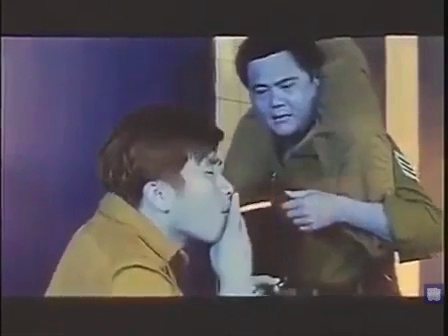

-------------------------------------------------
      1.0 frame3600
79 frame2625.jpg
show ans=  6.397052e-33
      6.397052e-33 frame2625
80 frame100.jpg
show ans=  0.99660647
smorking----------smorking------smorking------------------


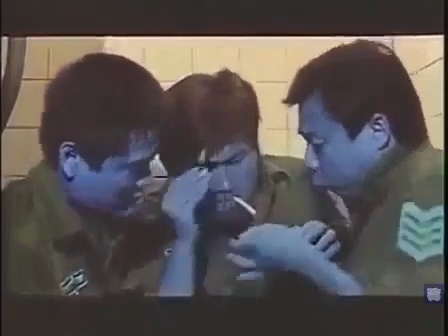

-------------------------------------------------
      0.99660647 frame100
81 frame1250.jpg
show ans=  2.7606048e-37
      2.7606048e-37 frame1250
82 frame3075.jpg
show ans=  9.052754e-06
      9.052754e-06 frame3075
83 frame4700.jpg
show ans=  0.0
      0.0 frame4700
84 frame125.jpg
show ans=  0.9977684
smorking----------smorking------smorking------------------


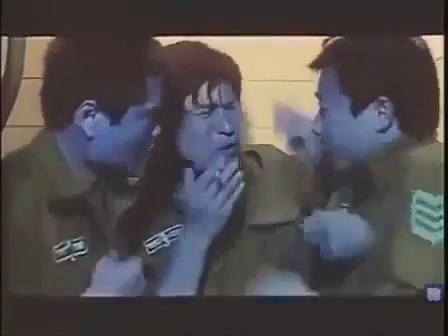

-------------------------------------------------
      0.9977684 frame125
85 frame5325.jpg
show ans=  3.3918966e-16
      3.3918966e-16 frame5325
86 frame1375.jpg
show ans=  1.4373509e-35
      1.4373509e-35 frame1375
87 frame1050.jpg
show ans=  0.99999285
smorking----------smorking------smorking------------------


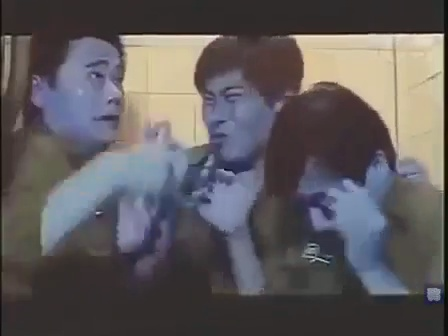

-------------------------------------------------
      0.99999285 frame1050
88 frame425.jpg
show ans=  0.99690646
smorking----------smorking------smorking------------------


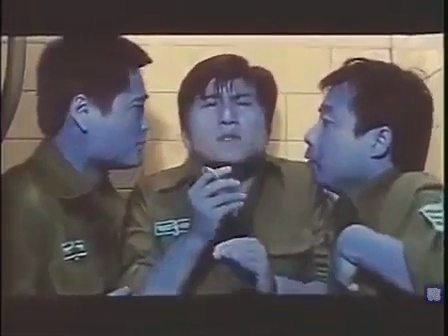

-------------------------------------------------
      0.99690646 frame425
89 frame900.jpg
show ans=  0.0
      0.0 frame900
90 frame3725.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


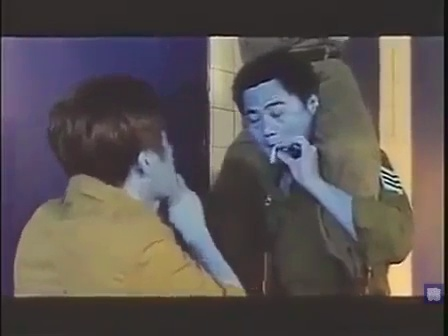

-------------------------------------------------
      1.0 frame3725
91 frame5150.jpg
show ans=  8.6933895e-08
      8.6933895e-08 frame5150
92 frame550.jpg
show ans=  0.9997925
smorking----------smorking------smorking------------------


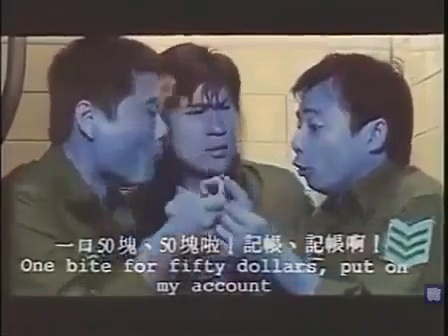

-------------------------------------------------
      0.9997925 frame550
93 frame4000.jpg
show ans=  2.4856796e-21
      2.4856796e-21 frame4000
94 frame3250.jpg
show ans=  1.6528551e-19
      1.6528551e-19 frame3250
95 frame1975.jpg
show ans=  0.0
      0.0 frame1975
96 frame1575.jpg
show ans=  1.7051258e-13
      1.7051258e-13 frame1575
97 frame3925.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


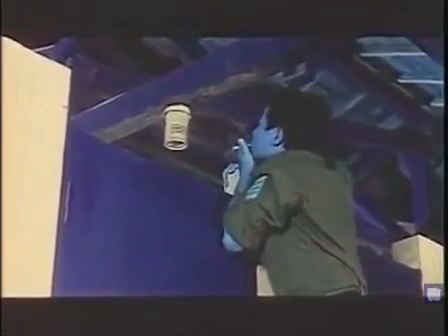

-------------------------------------------------
      1.0 frame3925
98 frame2525.jpg
show ans=  3.9180884e-31
      3.9180884e-31 frame2525
99 frame2425.jpg
show ans=  1.6816328e-20
      1.6816328e-20 frame2425
100 frame700.jpg
show ans=  5.383249e-38
      5.383249e-38 frame700
101 frame1275.jpg
show ans=  0.0
      0.0 frame1275
102 frame2300.jpg
show ans=  4.2842995e-28
      4.2842995e-28 frame2300
103 frame2925.jpg
show ans=  1.2702653e-18
      1.2702653e-18 frame2925
104 frame4300.jpg
show ans=  2.246712e-29
      2.246712e-29 frame4300
105 frame1000.jpg
show ans=  0.0
      0.0 frame1000
106 frame975.jpg
show ans=  0.0
      0.0 frame975
107 frame2750.jpg
show ans=  2.061369e-36
      2.061369e-36 frame2750
108 frame1725.jpg
show ans=  3.489205e-26
      3.489205e-26 frame1725
109 frame25.jpg
show ans=  4.2112773e-32
      4.2112773e-32 frame25
110 frame2975.jpg
show ans=  2.6557977e-16
      2.6557977e-16 frame2975
111 frame4800.jpg
show ans=  0.0
      0.0 frame4800
112 fr

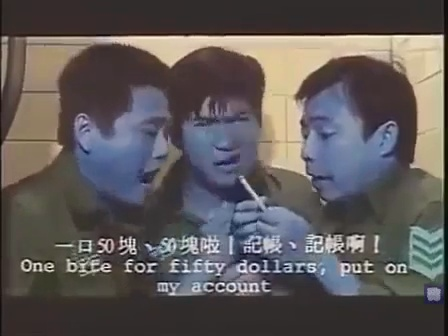

-------------------------------------------------
      1.0 frame575
115 frame1875.jpg
show ans=  0.0
      0.0 frame1875
116 frame2775.jpg
show ans=  0.0
      0.0 frame2775
117 frame2875.jpg
show ans=  1.1425749e-17
      1.1425749e-17 frame2875
118 frame4725.jpg
show ans=  5.4197306e-34
      5.4197306e-34 frame4725
119 frame5225.jpg
show ans=  4.247833e-08
      4.247833e-08 frame5225
120 frame1075.jpg
show ans=  2.1020243e-15
      2.1020243e-15 frame1075
121 frame3225.jpg
show ans=  4.163072e-17
      4.163072e-17 frame3225
122 frame1550.jpg
show ans=  7.3550355e-28
      7.3550355e-28 frame1550
123 frame3775.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


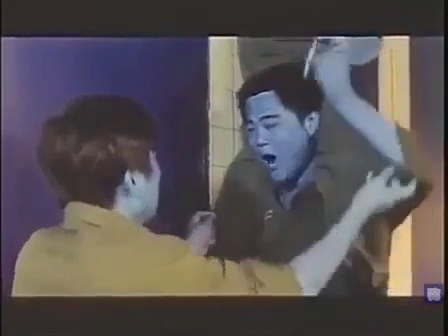

-------------------------------------------------
      1.0 frame3775
124 frame2950.jpg
show ans=  2.2106619e-17
      2.2106619e-17 frame2950
125 frame4525.jpg
show ans=  0.0
      0.0 frame4525
126 frame1700.jpg
show ans=  2.6636236e-36
      2.6636236e-36 frame1700
127 frame4250.jpg
show ans=  9.856119e-32
      9.856119e-32 frame4250
128 frame3100.jpg
show ans=  5.4162257e-16
      5.4162257e-16 frame3100
129 frame4075.jpg
show ans=  2.3666876e-24
      2.3666876e-24 frame4075
130 frame3975.jpg
show ans=  3.0504255e-28
      3.0504255e-28 frame3975
131 frame4475.jpg
show ans=  2.9265323e-15
      2.9265323e-15 frame4475
132 frame2850.jpg
show ans=  1.9173416e-23
      1.9173416e-23 frame2850
133 frame3350.jpg
show ans=  1.6835896e-21
      1.6835896e-21 frame3350
134 frame400.jpg
show ans=  0.999706
smorking----------smorking------smorking------------------


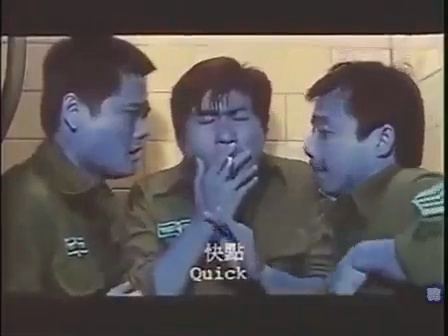

-------------------------------------------------
      0.999706 frame400
135 frame5300.jpg
show ans=  4.183858e-06
      4.183858e-06 frame5300
136 frame275.jpg
show ans=  0.99994826
smorking----------smorking------smorking------------------


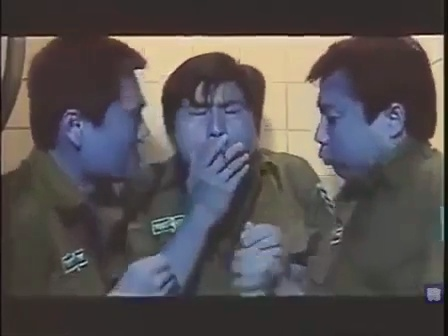

-------------------------------------------------
      0.99994826 frame275
137 frame5275.jpg
show ans=  4.388418e-06
      4.388418e-06 frame5275
138 frame4925.jpg
show ans=  9.3273995e-37
      9.3273995e-37 frame4925
139 frame1025.jpg
show ans=  0.6008162
smorking----------smorking------smorking------------------


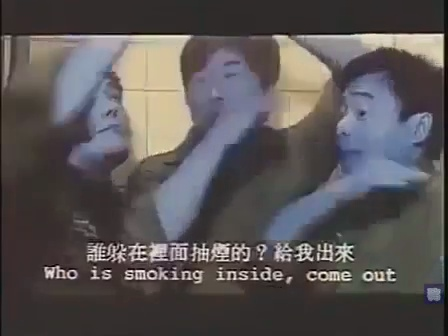

-------------------------------------------------
      0.6008162 frame1025
140 frame625.jpg
show ans=  0.9999031
smorking----------smorking------smorking------------------


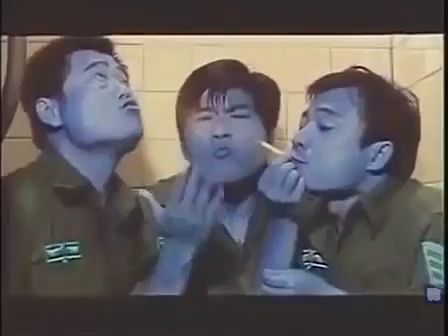

-------------------------------------------------
      0.9999031 frame625
141 frame4875.jpg
show ans=  0.0
      0.0 frame4875
142 frame3475.jpg
show ans=  0.00019524326
      0.00019524326 frame3475
143 frame2325.jpg
show ans=  9.3138755e-32
      9.3138755e-32 frame2325
144 frame3650.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


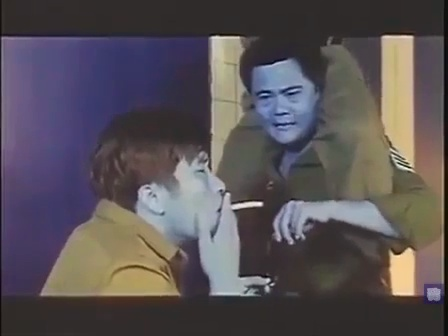

-------------------------------------------------
      1.0 frame3650
145 frame4450.jpg
show ans=  1.1307366e-19
      1.1307366e-19 frame4450
146 frame4950.jpg
show ans=  0.0
      0.0 frame4950
147 frame1650.jpg
show ans=  2.8574693e-26
      2.8574693e-26 frame1650
148 frame4150.jpg
show ans=  2.001005e-37
      2.001005e-37 frame4150
149 frame5200.jpg
show ans=  4.3710944e-08
      4.3710944e-08 frame5200
150 frame3525.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


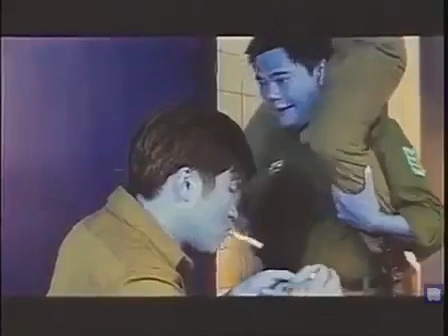

-------------------------------------------------
      1.0 frame3525
151 frame3950.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


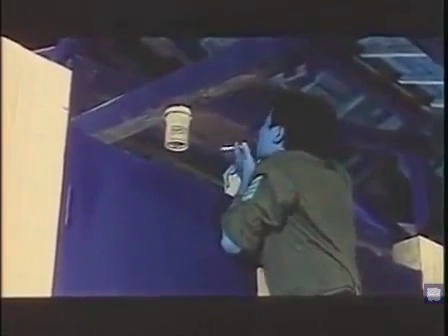

-------------------------------------------------
      1.0 frame3950
152 frame4050.jpg
show ans=  1.2691767e-31
      1.2691767e-31 frame4050
153 frame4225.jpg
show ans=  4.409505e-34
      4.409505e-34 frame4225
154 frame4625.jpg
show ans=  1.3344574e-11
      1.3344574e-11 frame4625
155 frame1200.jpg
show ans=  0.0
      0.0 frame1200
156 frame2725.jpg
show ans=  0.0
      0.0 frame2725
157 frame2450.jpg
show ans=  6.929951e-21
      6.929951e-21 frame2450
158 frame1400.jpg
show ans=  0.0
      0.0 frame1400
159 frame4025.jpg
show ans=  8.814132e-13
      8.814132e-13 frame4025
160 frame1800.jpg
show ans=  0.0
      0.0 frame1800
161 frame1100.jpg
show ans=  0.0017565322
      0.0017565322 frame1100
162 frame775.jpg
show ans=  1.5694037e-36
      1.5694037e-36 frame775
163 frame4375.jpg
show ans=  1.3009544e-18
      1.3009544e-18 frame4375
164 frame3700.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


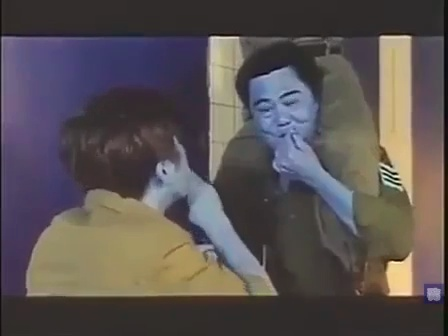

-------------------------------------------------
      1.0 frame3700
165 frame5100.jpg
show ans=  1.5196757e-19
      1.5196757e-19 frame5100
166 frame4325.jpg
show ans=  4.3562995e-29
      4.3562995e-29 frame4325
167 frame2675.jpg
show ans=  1.3301846e-35
      1.3301846e-35 frame2675
168 frame2025.jpg
show ans=  1.5632268e-27
      1.5632268e-27 frame2025
169 frame2600.jpg
show ans=  2.2408825e-37
      2.2408825e-37 frame2600
170 frame1675.jpg
show ans=  4.933269e-35
      4.933269e-35 frame1675
171 frame350.jpg
show ans=  0.99985754
smorking----------smorking------smorking------------------


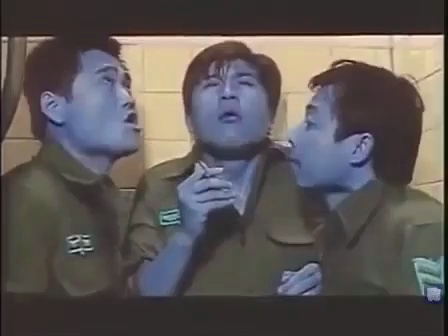

-------------------------------------------------
      0.99985754 frame350
172 frame1325.jpg
show ans=  0.0
      0.0 frame1325
173 frame4650.jpg
show ans=  0.0
      0.0 frame4650
174 frame475.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


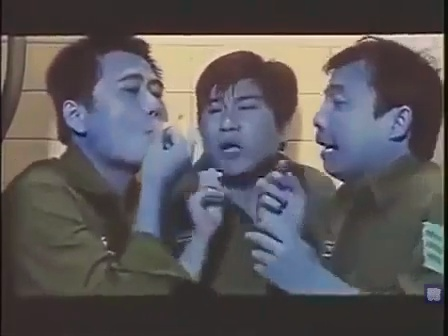

-------------------------------------------------
      1.0 frame475
175 frame4100.jpg
show ans=  2.523089e-37
      2.523089e-37 frame4100
176 frame325.jpg
show ans=  0.99999666
smorking----------smorking------smorking------------------


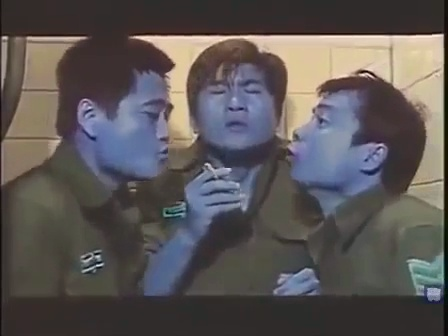

-------------------------------------------------
      0.99999666 frame325
177 frame2150.jpg
show ans=  7.763372e-35
      7.763372e-35 frame2150
178 frame4200.jpg
show ans=  2.3017485e-20
      2.3017485e-20 frame4200
179 frame4600.jpg
show ans=  8.527618e-12
      8.527618e-12 frame4600
180 frame3175.jpg
show ans=  8.7907156e-12
      8.7907156e-12 frame3175
181 frame3825.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


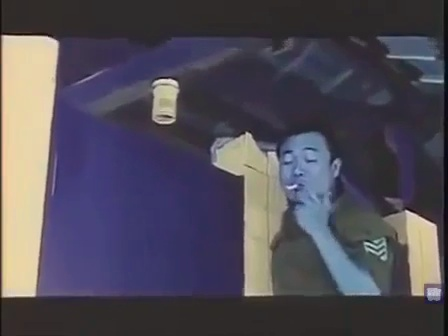

-------------------------------------------------
      1.0 frame3825
182 frame3300.jpg
show ans=  3.0791586e-23
      3.0791586e-23 frame3300
183 frame2800.jpg
show ans=  0.0
      0.0 frame2800
184 frame3850.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


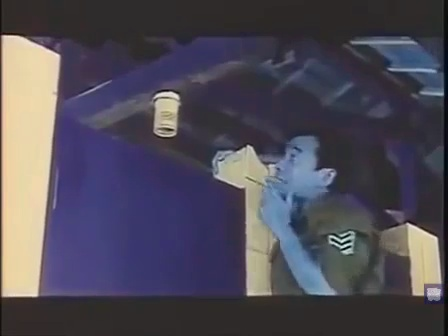

-------------------------------------------------
      1.0 frame3850
185 frame3325.jpg
show ans=  2.4655619e-23
      2.4655619e-23 frame3325
186 frame5000.jpg
show ans=  0.0
      0.0 frame5000
187 frame1175.jpg
show ans=  0.0
      0.0 frame1175
188 frame3125.jpg
show ans=  1.5560308e-16
      1.5560308e-16 frame3125
189 frame525.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


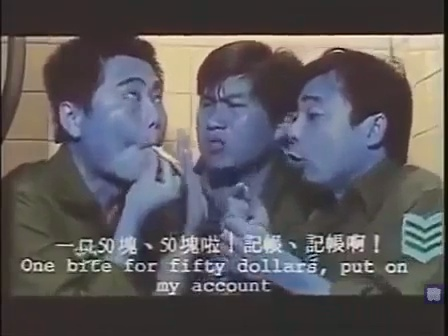

-------------------------------------------------
      1.0 frame525
190 frame1850.jpg
show ans=  0.0
      0.0 frame1850
191 frame1300.jpg
show ans=  0.0
      0.0 frame1300
192 frame4350.jpg
show ans=  8.478636e-24
      8.478636e-24 frame4350
193 frame2100.jpg
show ans=  5.1925777e-26
      5.1925777e-26 frame2100
194 frame3575.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


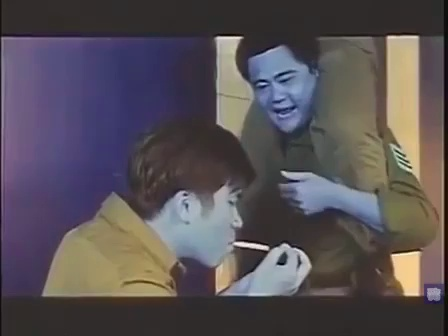

-------------------------------------------------
      1.0 frame3575
195 frame500.jpg
show ans=  1.0
smorking----------smorking------smorking------------------


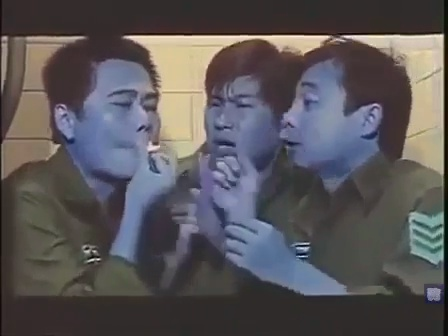

-------------------------------------------------
      1.0 frame500
196 frame4125.jpg
show ans=  2.7992407e-34
      2.7992407e-34 frame4125
197 frame825.jpg
show ans=  1.3424082e-13
      1.3424082e-13 frame825
198 frame2050.jpg
show ans=  3.3304934e-24
      3.3304934e-24 frame2050
199 frame2650.jpg
show ans=  1.0641071e-33
      1.0641071e-33 frame2650
200 frame150.jpg
show ans=  0.9363007
smorking----------smorking------smorking------------------


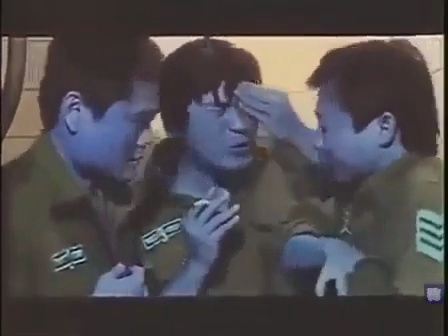

-------------------------------------------------
      0.9363007 frame150
201 frame800.jpg
show ans=  3.5927418e-37
      3.5927418e-37 frame800
202 frame2225.jpg
show ans=  0.0
      0.0 frame2225
203 frame3500.jpg
show ans=  0.0031248578
      0.0031248578 frame3500
204 frame2575.jpg
show ans=  6.4756967e-32
      6.4756967e-32 frame2575
205 frame3275.jpg
show ans=  3.3218509e-25
      3.3218509e-25 frame3275
206 frame2700.jpg
show ans=  1.0494554e-37
      1.0494554e-37 frame2700
207 frame3425.jpg
show ans=  3.446741e-33
      3.446741e-33 frame3425
208 frame1225.jpg
show ans=  1.2234042e-30
      1.2234042e-30 frame1225
209 frame1350.jpg
show ans=  5.3662205e-07
      5.3662205e-07 frame1350
210 frame2825.jpg
show ans=  0.0
      0.0 frame2825
211 frame4575.jpg
show ans=  0.9679243
smorking----------smorking------smorking------------------


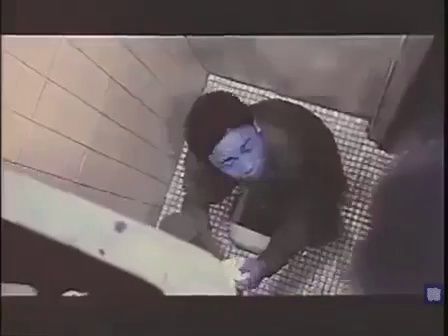

-------------------------------------------------
      0.9679243 frame4575
212 frame1600.jpg
show ans=  0.0
      0.0 frame1600
Finish prediction. 


In [11]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import numpy as np
import pandas as pd
import os
import os
import cv2
import time
  
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt
import glob
import numpy as np
from keras.preprocessing import image

from io import BytesIO
import PIL
from IPython.display import display, Image

if __name__ == '__main__':
    test_path = '../dataset/source/out/'
    # [cat, dog]
    # yiyi is 1 if the image is a dog, 0 if cat

    #model = load_model('/home/zhangzhe/pycharm/dogcat/src/fine_tuning_dogcat_resnet50')
    #print('model load finished')

    files = os.listdir(test_path)

    prediction = []
    file_indexs = []
    im_ind = 0
    print('Start Prediction: ')
    for file in files:
        print(im_ind, file)
        img_path = os.path.join(test_path, file)
        img_pil = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img_pil)
        img = np.expand_dims(img, axis=0)
        result = model.predict(img)
        file_name, suffix = file.split('.')
        prediction.append(result[0][1])
        file_indexs.append(file_name)
        ans = result[0][1];
        print('show ans= ', ans)
        if ans > 0.45:
            print ("smorking----------smorking------smorking------------------")
            img = cv2.imread(img_path)
            #plt.imshow(img)
            im = PIL.Image.fromarray(img)
            bio = BytesIO()
            im.save(bio, format='png')
            display(Image(bio.getvalue(), format='png'))
            print ("-------------------------------------------------")
            
        print('     ', result[0][1], file_name)
        im_ind += 1
    print('Finish prediction. ')

    #df = pd.DataFrame({'id':file_indexs, 'label':prediction})
    #df.to_csv('pred2.csv', index=None)
    #df.head(10)